# MICROSOFT MOVIE STUDIO

Final Project Submission

Student name: Milton Karatai Kabute

Student pace: Full time

Scheduled project review date/time: 10th Dec 2023

Instructor name: Winnie Anyoso

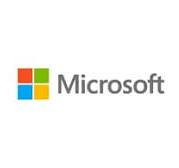

**Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

**Analysis of Movie Studio Data & Top Perfoming Genres**

This report analyzes movie studio data to derive insights into box office movie gross revenue, top-performing studios, best-selling movies, popular genres, and the correlation between domestic and foreign revenue. The analysis aims to assist Microsoft in making informed decisions within the movie industry.

**Business Understanding**

Stakeholder  - Microsoft

**Key Questions**

    -What are the revenue trends in the box office movie industry?

    -Which movie studios are top performers based on gross revenue?
    
    -What are the highest-grossing movies in the dataset?

    -Which movie genres are most popular among audiences?

    -Is there a correlation between domestic and foreign box office revenue?

**Data Understanding & Analysis**

**Source of Data**
The analysis utilises 2 datasets:

    -Box Office Gross Data
    -im.db Data
    
**Data Description**
    -Box Office Gross Data provides movie studios, foreign and domestic revenue
    -im.db conttains movie basics and ratings tables

**Import Relevant Libraries**

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression 
import sqlite3

**Loading the Data Set and Reviewing the Data.**

Load the data and inspect the first 10 rows of the data set.


In [2]:
#reading the data set using pandas dataframe
#assign the dataframe to variable name bom_movies
df= pd.read_csv(r'C:\\Users\\USER\\Project\\Movie_Studio\\Data\bom.movie_gross.csv')
bom_movies= df

In [3]:
#Show dataframe information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#checking number of rows and columns in the dataset
bom_movies.shape

(3387, 5)

In [5]:
#inspecting the first 10 rows of the data set
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#inspecting the last 10 rows of the data set
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
#view the columns of the data set
bom_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

**Data Understanding**

Inspecting the dataframe, Inspecting the Statistical Summary of the Dataset

In [8]:
#statistical summary of the data set for the foreign gross and domestic gross .
#descriptive summary shows the mean, stardard deviation, min, max values, quartiles.
print(bom_movies.describe())

       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


**Reviewing the Missing values in the Box Office Mojo Data**


In [9]:
#check missing values in the entire data in DataFrame
#display sum of missing values in each column
print(bom_movies.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Findings.

There are 5 missing values in studio column, 28 missing values in domestic gross and foreign gross are 1350.

**Data Preparation**

Data Cleaning of Box Office Movies
The  section seeks to handle missing values in the dataset to allow quality information for decision making

In [10]:
# Convert 'foreign_gross' column from object type to float
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '').astype(float)

#missing values and replacing with median
#check median for domestic gross and foreign gross
domestic_gross_median = bom_movies['domestic_gross'].median()
foreign_gross_median = bom_movies['foreign_gross'].median()

#handle missing values in domestic gross and foreign gross columns
bom_movies['domestic_gross'].fillna(domestic_gross_median, inplace=True)
bom_movies['foreign_gross'].fillna(foreign_gross_median,inplace = True)

# Drop rows where 'studio' column has missing  values
bom_movies.dropna(subset=['studio'], inplace=True)

# Display the clean dataframe
print(bom_movies)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

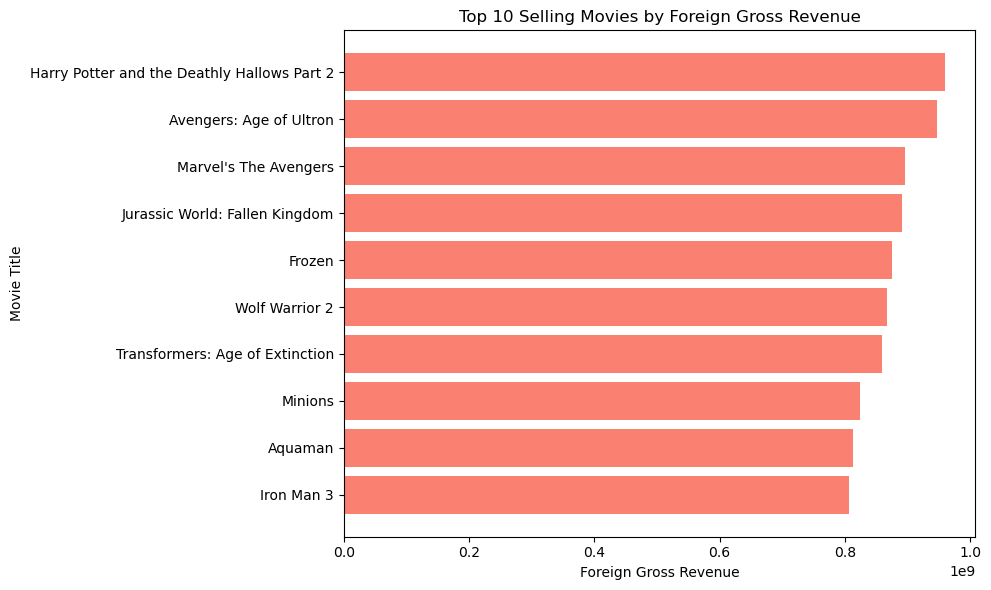

In [11]:
# Get the top 10 selling movies based on foreign gross revenue
top_selling_foreign_movies = bom_movies.nlargest(10, 'foreign_gross')

# Create a bar chart for top selling movies in foreign gross
plt.figure(figsize=(10, 6))
plt.barh(top_selling_foreign_movies['title'], top_selling_foreign_movies['foreign_gross'], color='salmon')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Selling Movies by Foreign Gross Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to display the top movie at the top
plt.tight_layout()

# Show the plot
plt.show()

The plot shows the top-selling movies to the foreign movies. Project reviews movies that are generating high gross in the foreign market.
Learning from the successful best selling movies, the insights guide that studio should script similar movies to the top 10 selling movies. According to Rasiing Network findings show that violence theme is prevalent in all top 10 selling movies in the foreign market.

**Recommendations.**

The top-selling movies bring crucial insights about the audience preferences and suggest that Microsoft Movie studio has an approach to aligning its movies and having a visual appeal that attracts an audience and will drive more revenues.
In addition, Microsoft should align its movie stories with the most prevalent themes in the top 10-selling movies, like violent scenes. Innovating the themes to resonate with the audience will drive more sales and make Microsoft Movie Studio the key driver in the movie industry. 
Lastly, adopting the cinematography techniques in visualizing the movies, as the audience is more attracted to the visuals. Investing in equipment and a technical team for the production of the movies. The outcome is that Microsoft Movie Studio will conquer the industry and drive more sales.


Analysis of Movies Revenue Generated. 
This will be an analysis of revenue generated over time in comparison between domestic and foreign gross

In [12]:
# Analyze trends in domestic and foreign gross over the years
yearly_trends = bom_movies.groupby('year')[['domestic_gross', 'foreign_gross']].mean()
print("Domestic and Foreign Gross Revenue Trend by Years:")
print(yearly_trends)

Domestic and Foreign Gross Revenue Trend by Years:
      domestic_gross  foreign_gross
year                               
2010    3.108205e+07   4.474850e+07
2011    2.529369e+07   4.434645e+07
2012    2.728072e+07   4.972152e+07
2013    3.085523e+07   5.521113e+07
2014    2.625211e+07   5.048012e+07
2015    2.456179e+07   4.454946e+07
2016    2.582076e+07   5.418748e+07
2017    3.416646e+07   7.063448e+07
2018    3.601042e+07   6.493179e+07


**Visualise Domestic and Foreign Gross Revenue Trend by Years**

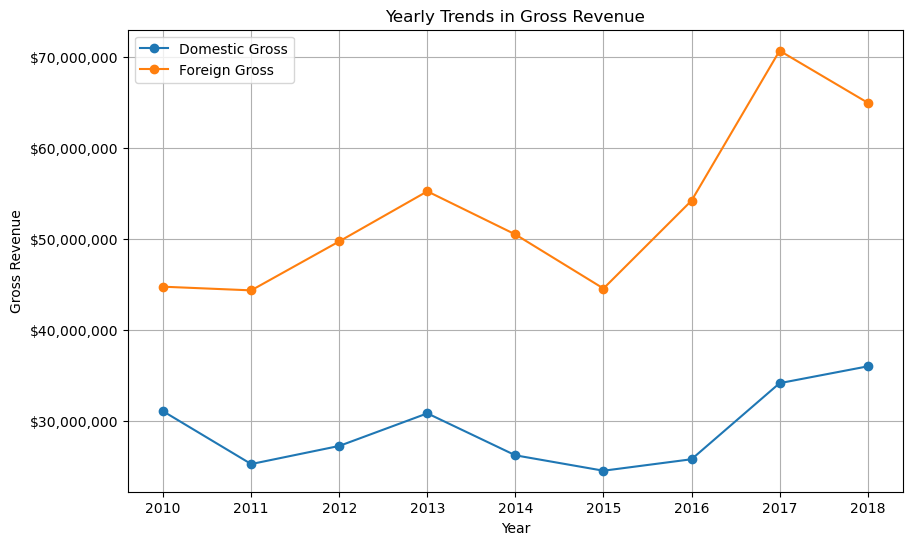

In [13]:
#create figure axis of 10 by 6 inches
fig, ax = plt.subplots(figsize=(10, 6))
#plot the yearly trends and labels
ax.plot(yearly_trends.index, yearly_trends['domestic_gross'], label='Domestic Gross', marker='o')
ax.plot(yearly_trends.index, yearly_trends['foreign_gross'], label='Foreign Gross', marker='o')
#label the the plot for readabiity
ax.set_title('Yearly Trends in Gross Revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Revenue')
ax.legend()
ax.grid(True)

#Format y-axis labels with a dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

#dollar sign formating on y-axis
formatter = FuncFormatter(dollar_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.show()

**Trend Analysis of  Domestic and Foreign Gross over Time**

This is a trend analysis of domestic and foreign gross at different times of the year. It shows that the foreign market over time has been above $40M in revenues with the domestic market struggling to hit the $40M mark.
The revenues in the domestic market may have been influenced by factors that led to low revenue.

**Recommendation.**

From the provided insights the recommendation is to have an equalised marketing budget for the Domestic Market Comparable to Foreign Markets
There is a consistent revenue trend where the foreign gross exceeds $40M while the domestic gross is struggling to near the $40M cap. Microsoft should allocate market budgets for both markets to balance the earnings, and if possible triple the foreign gross. Equalization of a marketing budget is aimed at creating audience engagement to increase movie viewership in all markets. This will create awareness, boost viewership of the movies that will significantly drive more revenues, and movies demand from Microsoft Studio. The strategy will contribute to success of Microsoft Movie Studio


Top Performing Studios by Revenue
Bar Charts of the gross revenues for Top 10 Studios in both the foreign and domestic market.
The project conducts assessment of the Studio Performance by their Total Gross both for foreign and domestic gross

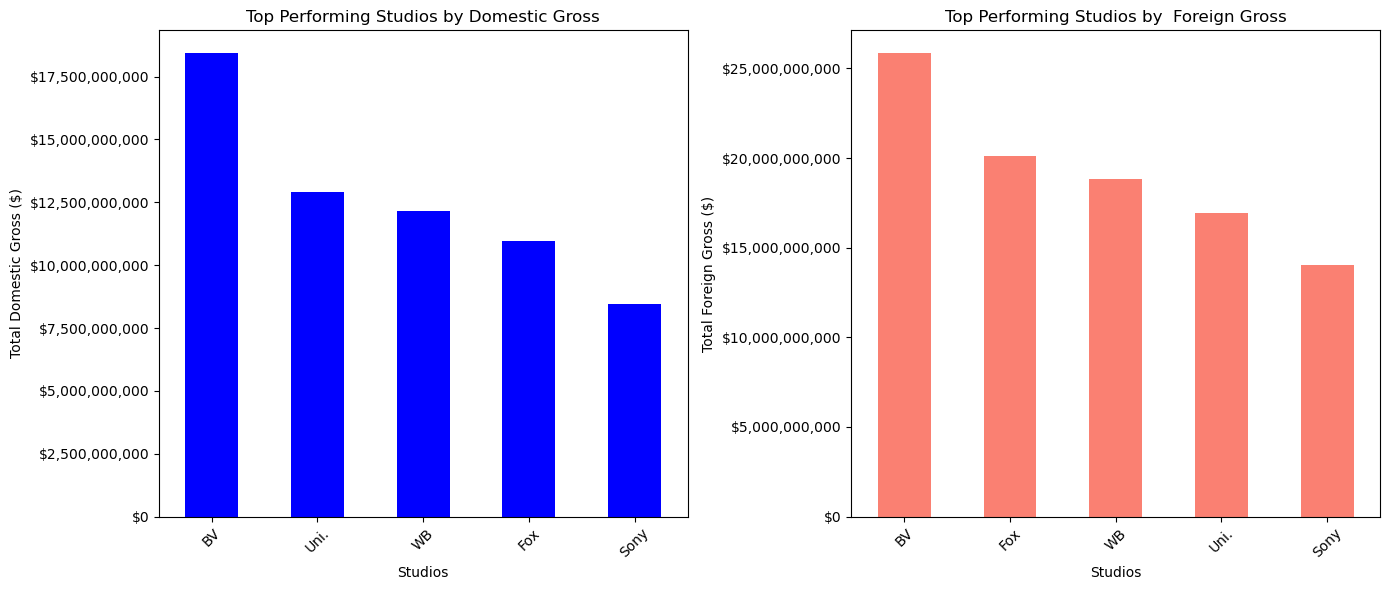

In [14]:
# Grouping by studio for analysis as per foreign and domestic gross
domestic_total_gross_by_studio= bom_movies.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
revenue_by_studio_foreign = bom_movies.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)

# Top performing studios for both domestic and foreign gross
top_studios_domestic = domestic_total_gross_by_studio.head(5)
top_studios_foreign = revenue_by_studio_foreign.head(5)

# Creating subplots with axs for domestic and foreign gross
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Format y-axis labels with a currency US dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Apply dollar formatting to the y-axis labels
formatter = FuncFormatter(dollar_formatter)
# Total Studios Domestic Gross subplot
top_studios_domestic.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Top Performing Studios by Domestic Gross')
axs[0].set_xlabel('Studios')
axs[0].set_ylabel('Total Domestic Gross ($)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].yaxis.set_major_formatter(formatter)

# Total studios Foreign Gross subplot
top_studios_foreign.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top Performing Studios by  Foreign Gross')
axs[1].set_xlabel('Studios')
axs[1].set_ylabel('Total Foreign Gross ($)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

**Findings**

Domestic and foreign gross revenues over time have been consistent in all studios surpassing the $40M mark as the domestic is struggling.  However, the difference between them is led by factors on strategy , and having a brand that is identical in the industry that is known for producing quality movies and resonating with the audience tastes and preference.

**Recommendations**

To bridge this gap, it's recommended that Microsoft implement one of the components of Sustainable development where corporates create partnerships. In this regard, Microsoft should create partnerships with top-performing studios. 

Creating partnerships will give Microsoft access to the best talent pool in the studios thus production of movies will be exceptional. Movies produced will be of high quality and attract audiences that want to enjoy quality movies. This will be a low-risk strategy to enter the movie market, as it will help Microsoft build its brand in a low-budget manner. Lastly, having a profit-sharing model will reduce the cost of marketing and reduce the risk of Microsoft making losses, as they will be relying on existing studio brands



In [15]:
#use the foreign gross and domestic gross to find their relationship
correlation = bom_movies['foreign_gross'].corr(bom_movies['domestic_gross'])
correlation

0.7840594568087642

There is a strong relationship between gross generated in the domestic and foreign market. The relationship infers that all movies produced appeal across the borders,and the cinephiles (movies fans) have a similar taste/ preferrence of the movies that they are attacted to watch.

**Plot a scatterplot to show the relationship between Domestic gross and Foreign Gross**

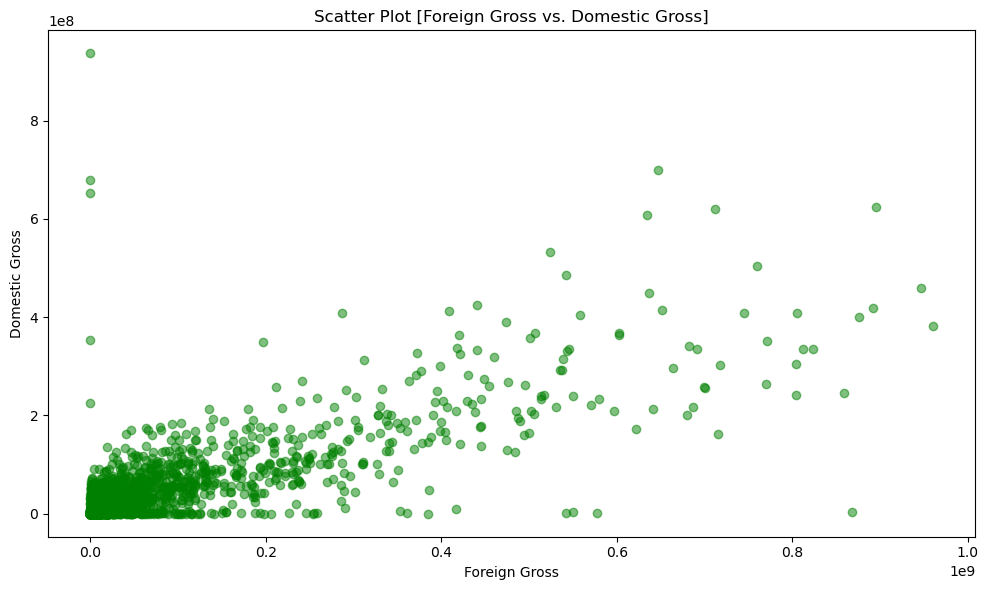

In [16]:
# Use om_movies columns that are  'Foreign Gross' and 'Domestic Gross' columns
# Scatter plot between 'Foreign Gross' and 'Domestic Gross'
plt.figure(figsize=(10, 6))
#plot scatter plot
plt.scatter(bom_movies['foreign_gross'], bom_movies['domestic_gross'], color='green', alpha=0.5)
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Scatter Plot [Foreign Gross vs. Domestic Gross]')

# Display the plot
plt.tight_layout()
plt.show()


**Findings**

There is a strong relationship between the domestic and foreign gross.  This is an assumption that movies produced have a universal appealing attracting movie enthusiasts across the globe. Therefore, movies that have a demand in the domestic as well in foreign market thus a strong relationship between domestic and foreign gross as the correlation coefficient is at 0.78. 

**Recommendations**

Microsoft should invest in production of movies that are appealing in the domestic sector and in foreign production. A working strategy involve tailor the movies that are both localized and global appealing to optimize revenue streams.
Microsoft adopting marketing strategies to resonate with audience in both markets to generate more revenues, and adjust budget allocation to movies that are doing well in domestic and foreign market.
In addition, it is recommended that Microsoft should work on the marketing strategies, this by allocating more funds in the distribution of the movies in both the domestic and foreign. In reflection to the correlation, it shows that movies doing well in domestic market can as well sell in the foreign market, therefore the movies should both resonate in both audience.


**IMDB Data Review**

Explore Data using SQL queries . Exploring the Tables in the Database File

In [17]:
#file path to my sqlite database file
movies_data = 'C:\\Users\\USER\\Project\\Movie_Studio\\Data\\im.db'

#connect the database file to sqlite
conn = sqlite3.connect(movies_data)

#retrieve all tables from the dataset 
dataset = '''
SELECT * 
FROM sqlite_master'''

#create cursor  
cursor = conn.cursor()

#query on the dataset
cursor.execute(dataset)

#show the table names in the database file
dataset= cursor.fetchall()

#show all tables in the datasets
for table in dataset:
    print(table[1])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


**Explore dataset in the movie Ratings, Movie basics data tables**

The basic explorations involves the tables that are relevant to the business understanding of the movies. Therefore the following tables will show each table datasets. 

**Explore Movie Ratings Table**

In [18]:
#query movie ratings table
movie_ratings_data = '''
SELECT * 
FROM movie_ratings;'''

#pd dataframe to read sql query as movie ratings and display the data
movie_ratings_data = pd.read_sql(movie_ratings_data, conn)
movie_ratings_data

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [19]:
#check missing values in the data set
movie_ratings_data.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [20]:
#inspect values in the movie ratings table
movie_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
#decriptive statistics of the movie ratings table
movie_ratings_data.describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


**Explore Movie Basics Table**

In [22]:
#query movie basics table
movie_basics_data= '''
SELECT * 
FROM movie_basics;
'''
#pd dataframe to read sql query as movie basics and display the data
movie_basics_data = pd.read_sql(movie_basics_data, conn)
movie_basics_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [23]:
#inspect null values in the movie basics table
movie_basics_data.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [24]:
#Drop null values and use inplace to modify table and check the table again
movie_basics_data.dropna(inplace=True)
movie_basics_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [25]:
#inspect the values in the table
movie_basics_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
#statistical summary of movie basics table
movie_basics_data.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


Join Tables sharing common Column Movie ID
Movie Basics and Movie Ratings share a common primary Key (movie_id). We join the 2 dataframes

In [27]:
#join the dataframes and assign it a new variable name basics_rates
basics_rates = movie_basics_data.merge(movie_ratings_data, on='movie_id', how='inner')

In [28]:
#inspect the new the basic_rates table on the first 10 rows
basics_rates.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
5,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
6,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
7,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
8,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
9,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6


In [29]:
#inspect the last 5 rows of the basic_rates table
basics_rates.tail(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
65719,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [30]:
#review the descriptive statistics of  basic_rates table
basics_rates.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [31]:
#review the the new basic_rates info
basics_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [32]:
#Exlplore which genre has the top 10 highest numvotes
top_numvotes = basics_rates.groupby('genres')['numvotes'].mean().sort_values(ascending=False)
top_numvotes.head(10)

genres
Action,Fantasy,War           262978.000000
Action,Adventure,Sci-Fi      187179.292683
Adventure,Mystery,Sci-Fi     135042.500000
Adventure,Drama,Sci-Fi        99316.950000
Action,Adventure,Fantasy      96588.050000
Biography,Drama,Thriller      88518.904762
Action,Adventure,Thriller     81476.152174
Action,Adventure,Mystery      80838.111111
Action,Crime,Sci-Fi           78214.125000
Family,Fantasy,Musical        59606.500000
Name: numvotes, dtype: float64

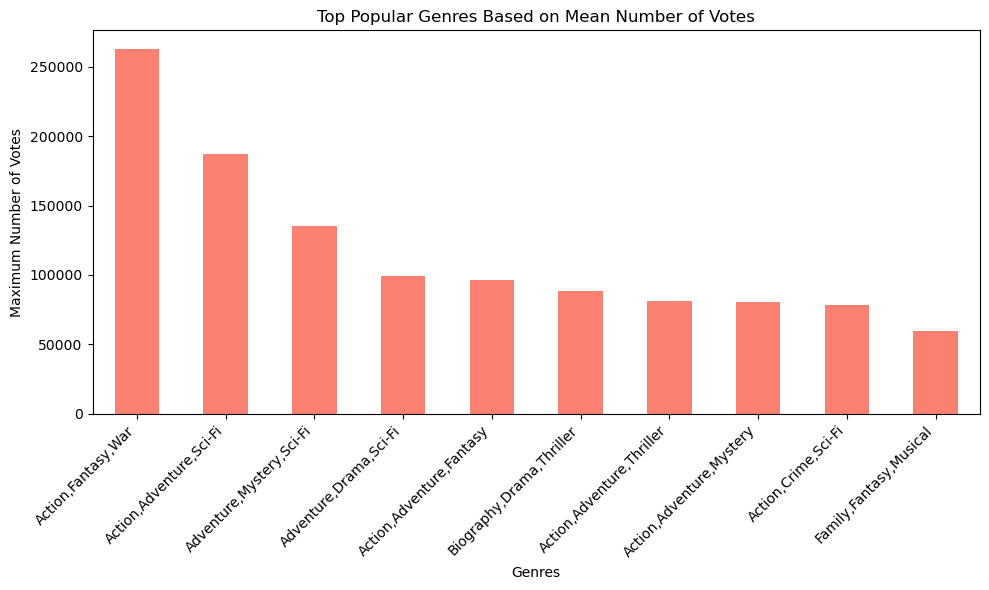

In [33]:
# Top 10 genres by the maximum votes
top_genres = top_numvotes.head(10) 

# Plotting the graph
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='salmon')
#label the axis
plt.xlabel('Genres')
plt.ylabel('Maximum Number of Votes')
plt.title('Top Popular Genres Based on Mean Number of Votes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
#display the plot
plt.show()

The plot chart above shows the top grouped genre which received high number of votes. The data insights are quite informative to Microsoft as it shares the audience preferences of the genres.

The analysis of top-selling movies underscores the significance of narratives centered around action, Sci-Fi,War, adventure and thrilling experiences. These themes have shown strong resonance with audience preference. Further insight is that adventure and actions are predominant in the grouped themes.

**Recommendations**

Microsoft's movie studio should prioritize creating movies that have action, adventures, sci-fi, and drama as they can be combined into other genres that are low performing to create uniqueness in their movies as the popular genres will command the movie sector and drive more revenues.
The popular genres will attract more viewers to action, and drama genres from  a large demographic and increase the studio revenue
Lastly, Microsoft should have strategic marketing to engage the audience to view certain themes produced that are related to the top popular genres.
audience with new production movies, and leverage on media houses, social media influencers to review their movies as influencers influence their fan base as new audience.